In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
class NIN(nn.Module):
    def __init__(self, num_classes=10):
        super(NIN, self).__init__()
        self.mlpconv1 = nn.Sequential(
            nn.Conv2d(3, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 160, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(160, 96, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.mlpconv2 = nn.Sequential(
            nn.Conv2d(96, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.mlpconv3 = nn.Sequential(
            nn.Conv2d(192, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, num_classes, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=8, stride=1)
        )
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.mlpconv1(x)
        x = self.dropout(x)
        x = self.mlpconv2(x)
        x = self.dropout(x)
        x = self.mlpconv3(x)
        x = x.view(x.size(0), -1)
        return x

In [3]:
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [4]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NIN(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
model

NIN(
  (mlpconv1): Sequential(
    (0): Conv2d(3, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(192, 160, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(160, 96, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (mlpconv2): Sequential(
    (0): Conv2d(96, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU(inplace=True)
    (6): AvgPool2d(kernel_size=3, stride=2, padding=1)
  )
  (mlpconv3): Sequential(
    (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2

In [7]:
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")

Epoch [1/100], Loss: 2.2395
Epoch [2/100], Loss: 2.1643
Epoch [3/100], Loss: 2.1144
Epoch [4/100], Loss: 1.9463
Epoch [5/100], Loss: 1.7612
Epoch [6/100], Loss: 1.6758
Epoch [7/100], Loss: 1.6132
Epoch [8/100], Loss: 1.5655
Epoch [9/100], Loss: 1.5133
Epoch [10/100], Loss: 1.3854
Epoch [11/100], Loss: 1.3135
Epoch [12/100], Loss: 1.2711
Epoch [13/100], Loss: 1.2263
Epoch [14/100], Loss: 1.2032
Epoch [15/100], Loss: 1.0838
Epoch [16/100], Loss: 1.0152
Epoch [17/100], Loss: 0.9859
Epoch [18/100], Loss: 0.9573
Epoch [19/100], Loss: 0.9362
Epoch [20/100], Loss: 0.9173
Epoch [21/100], Loss: 0.8995
Epoch [22/100], Loss: 0.8829
Epoch [23/100], Loss: 0.8672
Epoch [24/100], Loss: 0.8556
Epoch [25/100], Loss: 0.8443
Epoch [26/100], Loss: 0.8292
Epoch [27/100], Loss: 0.8231
Epoch [28/100], Loss: 0.8121
Epoch [29/100], Loss: 0.8008
Epoch [30/100], Loss: 0.7934
Epoch [31/100], Loss: 0.7874
Epoch [32/100], Loss: 0.7761
Epoch [33/100], Loss: 0.7742
Epoch [34/100], Loss: 0.7672
Epoch [35/100], Loss: 0

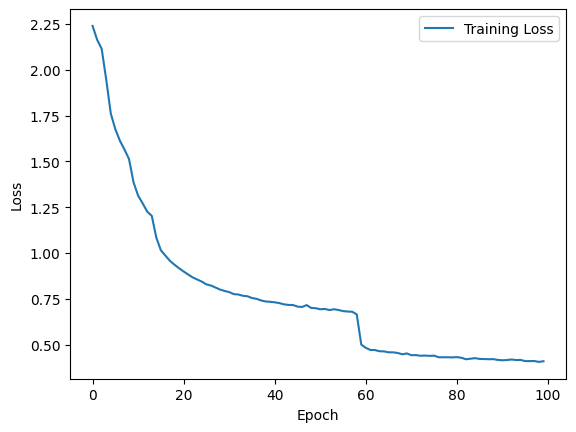

In [8]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 73.94%


In [10]:
# save model
torch.save(model.state_dict(), f'saved_models/nin_cifar10_{datetime.now().strftime("%Y%m%d%H%M%S")}.pth')